In [1]:
import keras

In [2]:
import numpy as np
import pandas as pd


data=pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Deleting unvalue data
del data['Unnamed: 32'] 

In [4]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# splittting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=0)

#feature scaling

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [5]:
#from keras.models import sequential
from keras.models import Sequential
from keras.layers import Dense 

In [6]:
# classifier.add(Dense(units,output_dim=16, init='uniform', activation = 'relu', input_dim=30))

# adding 1st hidden layer
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))

# adding 2nd hidden layer
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# adding 3rd output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))



In [7]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'] )

In [8]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.6262
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6821
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.7295
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.8417
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.8939
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.9070
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.9228
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.9383
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.9413
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.9337
Epoch 11/150
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9881
Epoch 84/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 85/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9891
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9915
Epoch 87/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9858
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9867
Epoch 89/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9883
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9877
Epoch 91/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9912
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9842
Epoch 93/150
6/6 [===============

<AxesSubplot:>

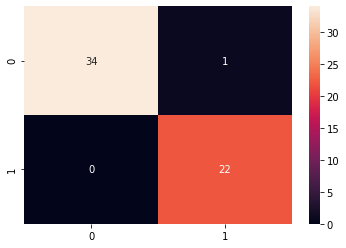

In [10]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def built_classifiter():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))
    classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'] )
    return classifier

classifier = KerasClassifier(build_fn = built_classifiter, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X= X_train, y= y_train, cv=10, n_jobs=-1)

In [19]:
accuracies

array([0.94230771, 0.94230771, 1.        , 0.98039216, 0.98039216,
       0.94117647, 0.98039216, 0.98039216, 1.        , 1.        ])

In [20]:
accuracies.mean()

0.9747360527515412

In [22]:
accuracies.std()

0.02296128755609569